In [9]:
import tensorflow as tf
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt

In [16]:
# the following code loads the 3d numpy array output that we get from the 
# file vggish_input.py 
# the shape of this array is [num_examples, num_frames, num_bands]

specs = np.load('readnumpy.npy') # the bigger array 

In [13]:
# reading the contents of the tf records that we get as output for the 
# vggish_inference_demo.py.

tfrecords_filename = 'result.tfrecord'
record_iterator = tf.python_io.tf_record_iterator(path=tfrecords_filename)
string_record = next(record_iterator)
example = tf.train.SequenceExample()
example.ParseFromString(string_record)

f = example.feature_lists.feature_list['audio_embedding']

hexembed = f.feature[59].bytes_list.value[0].hex()

vggish_embed = [int(hexembed[i:i+2],16) for i in range(0,len(hexembed),2)]
print(arrayembed)

[164, 12, 155, 82, 208, 104, 86, 99, 160, 209, 151, 142, 109, 179, 116, 96, 141, 110, 112, 129, 74, 234, 71, 97, 87, 242, 160, 189, 162, 163, 133, 112, 129, 87, 95, 144, 148, 116, 138, 56, 193, 186, 73, 110, 72, 163, 252, 143, 87, 110, 169, 136, 86, 85, 114, 92, 182, 54, 112, 186, 199, 124, 42, 172, 132, 134, 145, 21, 167, 108, 173, 196, 215, 255, 98, 166, 67, 173, 163, 77, 104, 80, 188, 44, 92, 151, 153, 150, 145, 91, 255, 196, 118, 200, 52, 255, 47, 169, 69, 255, 182, 88, 100, 0, 47, 230, 176, 186, 255, 239, 65, 134, 89, 145, 161, 89, 207, 222, 0, 151, 255, 191, 0, 36, 224, 0, 0, 255]


In [14]:
# the smaller array that we have 
# the mamimum range of the f is 59 ie there are 60 observations in f. 

len(vggish_embed) 

128

In [15]:
# this is not that much importance to us 
len(hexembed)

256

In [5]:
# getting all the 60 observations in the form of an array rather than a tf record for easy understanding and 
# usage

answer = []
for x in range(0, 60):
    temp = f.feature[x].bytes_list.value[0].hex()
    answer.append([int(temp[i:i+2],16) for i in range(0,len(temp),2)])
    
print(answer)
print(len(answer))
print(len(answer[0]))

[[157, 10, 166, 68, 207, 103, 97, 99, 159, 225, 106, 166, 114, 200, 102, 95, 140, 77, 115, 108, 52, 254, 72, 122, 38, 190, 140, 180, 133, 157, 160, 63, 135, 68, 62, 188, 114, 146, 220, 11, 201, 173, 7, 65, 161, 255, 255, 182, 75, 69, 164, 120, 28, 142, 111, 32, 199, 22, 101, 230, 217, 114, 94, 119, 68, 25, 129, 22, 194, 32, 118, 223, 188, 249, 173, 158, 2, 253, 230, 179, 6, 15, 255, 131, 42, 48, 80, 207, 97, 34, 255, 255, 140, 171, 85, 255, 45, 254, 99, 255, 127, 25, 96, 31, 56, 156, 116, 138, 159, 238, 0, 120, 242, 85, 236, 55, 239, 232, 0, 148, 255, 92, 0, 0, 85, 0, 19, 255], [156, 9, 167, 73, 203, 97, 93, 100, 173, 211, 109, 160, 112, 189, 88, 102, 122, 75, 120, 116, 51, 245, 78, 117, 43, 201, 142, 183, 141, 159, 149, 94, 141, 57, 65, 166, 115, 146, 202, 31, 179, 207, 0, 65, 149, 237, 255, 128, 67, 106, 168, 97, 39, 140, 96, 21, 205, 21, 101, 255, 213, 100, 70, 139, 95, 32, 97, 17, 203, 64, 120, 234, 175, 252, 175, 167, 49, 234, 229, 220, 0, 63, 254, 138, 93, 48, 100, 179, 130, 35, 

In [7]:
# 60 observations and 128 features

answer = np.array(answer)
answer.shape

(60, 128)

In [82]:
# doing PCA decomposition of the numpy array answer 
pca = decomposition.PCA()
pca.fit(answer)
print(pca)

# applying dimentionaly reduction to that array 
transformed_data = pca.transform(answer)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


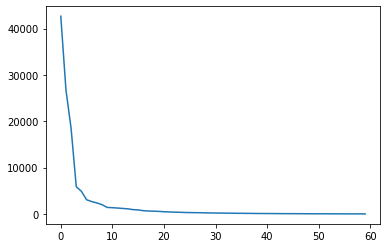

In [81]:
plt.plot(pca.explained_variance_)

In [11]:
# storing the first two componets of the PCA in two varibales for easy plotting later 

first_pc = pca.components_[0]
second_pc = pca.components_[1]

In [29]:
# selecting all the rows for the first 2 columns 
# here colum 2 is not selected and only 0, 1 colum is selected 
# we are selecting only 2 columns becasue we need to plot the data on a 2d graph. 

X_transformed = transformed_data[:,0:2]

In [12]:
transformed_data.shape

plot1 = transformed_data[:,0]
plot2 = transformed_data[:,1]

In [25]:
print(first_pc)
print(len(first_pc))

[ 7.93912077e-03  6.11210168e-03 -7.75417551e-03  2.05814383e-02
 -4.98794595e-03 -2.55980560e-03 -5.39262434e-02 -8.59158651e-03
 -7.30993333e-03 -5.83713052e-02  5.62278353e-02 -9.54924333e-02
 -9.53777428e-03 -4.41026129e-02 -2.23461503e-05 -5.15502501e-02
  2.34839736e-02  4.08185245e-02 -3.63860886e-02  5.94345933e-02
  1.44810090e-02 -2.41146589e-02  7.68194400e-02  3.65695033e-02
  1.03573234e-02  4.76385223e-02  8.09830453e-02 -1.06783134e-01
  3.22145168e-02  2.26475557e-02 -1.45347223e-01  1.23935328e-01
  5.92349970e-02  2.09963679e-02  4.23960694e-02 -1.48356041e-01
  4.20838778e-02  3.69593581e-02 -1.94586888e-01  5.99191584e-02
 -5.83280162e-02  3.12408579e-02  3.60293188e-02  6.93057433e-02
 -1.35276979e-01 -1.08993296e-01 -2.98679804e-02 -1.44008586e-01
 -6.68288531e-02  1.32592296e-01 -1.08474456e-01  7.73573382e-03
  1.27840536e-01 -8.26007284e-02  9.63109840e-02  1.08409175e-01
  1.51343975e-02  4.30591148e-02 -5.08750873e-03 -5.38285624e-02
 -5.91955497e-02 -6.89649

In [26]:
print(second_pc)
print(len(second_pc))

[-1.14619488e-02 -7.81728337e-03 -5.91658669e-03 -2.33716832e-03
 -1.68390101e-02 -2.92524565e-02 -6.79482286e-04 -1.96476186e-03
  4.15543099e-02 -1.14546167e-02 -6.08187117e-02 -2.79020177e-02
  2.20774314e-02  2.70991551e-02 -8.08078867e-02 -5.59405303e-02
  3.25505415e-02 -6.49552066e-02 -6.36891982e-02  6.53549850e-03
 -1.09030660e-02 -6.82003292e-03  7.67116806e-02  2.80339010e-02
  2.69338426e-03 -8.82328506e-02  3.49342857e-02 -6.19347756e-02
 -1.36504948e-02 -7.48873678e-03 -5.01748502e-02  5.04472431e-02
  3.00449907e-02 -1.24628925e-01  1.11010686e-02 -4.23547414e-02
 -5.66924632e-02  9.63523190e-02  2.26589128e-02 -5.98014263e-02
 -4.42620881e-02  7.16966999e-02 -9.52893977e-02  1.01144634e-02
  1.36315748e-01  8.28888870e-02 -2.27862697e-03 -2.15073732e-01
 -7.93153973e-02  8.04335991e-02 -1.17667509e-01 -1.37743617e-01
 -2.55524965e-02  8.06908522e-02  6.22285411e-02 -1.40843756e-01
 -1.18828268e-02 -3.23648568e-02  4.51564209e-02  4.56284511e-03
 -7.83549932e-02 -4.15235

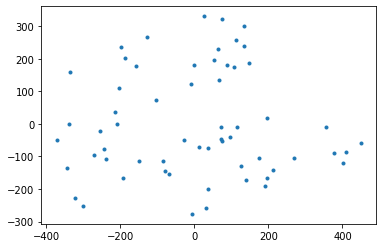

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# this is a tweek that is done to make changes to the plot
x = np.linspace(0, 2, 100)

plt.plot(plot1, plot2, ".")

plt.show()

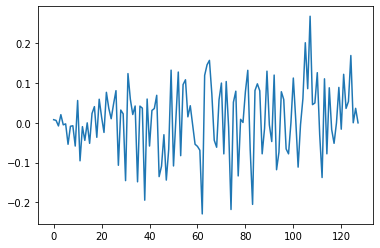

In [38]:
plt.plot(pca.components_[0])

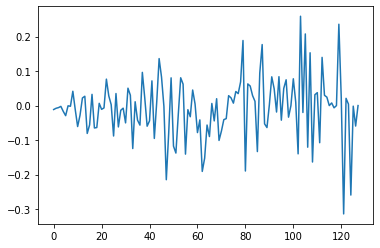

In [39]:
plt.plot(pca.components_[1])

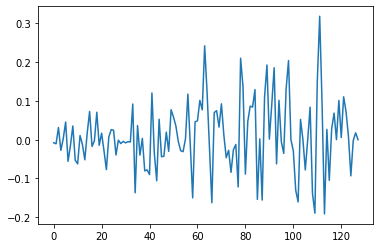

In [40]:
plt.plot(pca.components_[2])

In [78]:
from matplotlib import offsetbox

def plot_embedding(X_transformed, X, title=None, y = None):
    x_min, x_max = np.min(X_transformed, 0), np.max(X_transformed, 0)
    X_transformed = (X_transformed - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X_transformed.shape[0]):
        if y is None:
            plt.text(X_transformed[i, 0], X_transformed[i, 1], str("o"),
                     fontdict={'weight': 'bold', 'size': 9})
        else:
            plt.text(X_transformed[i, 0], X_transformed[i, 1], str(y[i]),
                     color=plt.cm.Set1(y[i] / 10.),
                     fontdict={'weight': 'bold', 'size': 9})
            

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X_transformed.shape[0]):
            dist = np.sum((X_transformed[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X_transformed[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X[i, :, :], cmap=plt.cm.gray_r),
                X_transformed[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


In [79]:
X.shape
# TODO : 
# color 
# size 
# transform them
# make the figure bigger

(60, 2)

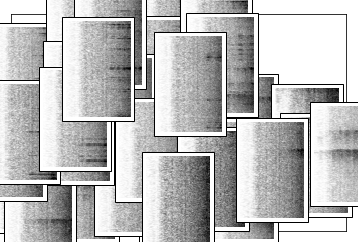

In [80]:
plot_embedding(X_transformed, specs)